In [ ]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [ ]:
df["Species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
def predict(sample, tree):
    if not isinstance(tree, dict):
        return tree
    feat = list(tree.keys())[0]
    branch = tree[feat]
    val = sample[feat]
    if val in branch:
        out = predict(sample, branch[val])
        if isinstance(out, dict):
            counts = {}
            for v in out.values():
                if not isinstance(v, dict):
                    counts[v] = counts.get(v, 0) + 1
            return max(counts, key=counts.get)
        return out
    else:
        counts = {}
        for v in branch.values():
            if isinstance(v, dict):
                for lv in v.values():
                    if not isinstance(lv, dict):
                        counts[lv] = counts.get(lv, 0) + 1
            else:
                counts[v] = counts.get(v, 0) + 1
        return max(counts, key=counts.get)


In [ ]:
def build_tree(data, feats, target):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    if len(feats) == 0:
        return data[target].mode()[0]

    gains = [gain(data, f, target) for f in feats]
    best = feats[np.argmax(gains)]

    tree = {best: {}}
    for v in np.unique(data[best]):
        sub = data[data[best] == v]
        if sub.shape[0] == 0:
            tree[best][v] = data[target].mode()[0]
        else:
            rest = [f for f in feats if f != best]
            tree[best][v] = build_tree(sub, rest, target)
    return tree


In [ ]:
tree = build_tree(df, features, target)
print_tree(tree)


petal length (cm)?
|-- 1.0
  -> setosa
|-- 1.1
  -> setosa
|-- 1.2
  -> setosa
|-- 1.3
  -> setosa
|-- 1.4
  -> setosa
|-- 1.5
  -> setosa
|-- 1.6
  -> setosa
|-- 1.7
  -> setosa
|-- 1.9
  -> setosa
|-- 3.0
  -> versicolor
|-- 3.3
  -> versicolor
|-- 3.5
  -> versicolor
|-- 3.6
  -> versicolor
|-- 3.7
  -> versicolor
|-- 3.8
  -> versicolor
|-- 3.9
  -> versicolor
|-- 4.0
  -> versicolor
|-- 4.1
  -> versicolor
|-- 4.2
  -> versicolor
|-- 4.3
  -> versicolor
|-- 4.4
  -> versicolor
|-- 4.5
  sepal length (cm)?
  |-- 4.9
    -> virginica
  |-- 5.4
    -> versicolor
  |-- 5.6
    -> versicolor
  |-- 5.7
    -> versicolor
  |-- 6.0
    -> versicolor
  |-- 6.2
    -> versicolor
  |-- 6.4
    -> versicolor
|-- 4.6
  -> versicolor
|-- 4.7
  -> versicolor
|-- 4.8
  sepal length (cm)?
  |-- 5.9
    -> versicolor
  |-- 6.0
    -> virginica
  |-- 6.2
    -> virginica
  |-- 6.8
    -> versicolor
|-- 4.9
  sepal width (cm)?
  |-- 2.5
    -> versicolor
  |-- 2.7
    -> virginica
  |-- 2.8
    -> vi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X = pd.get_dummies(df.drop(target, axis=1))
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


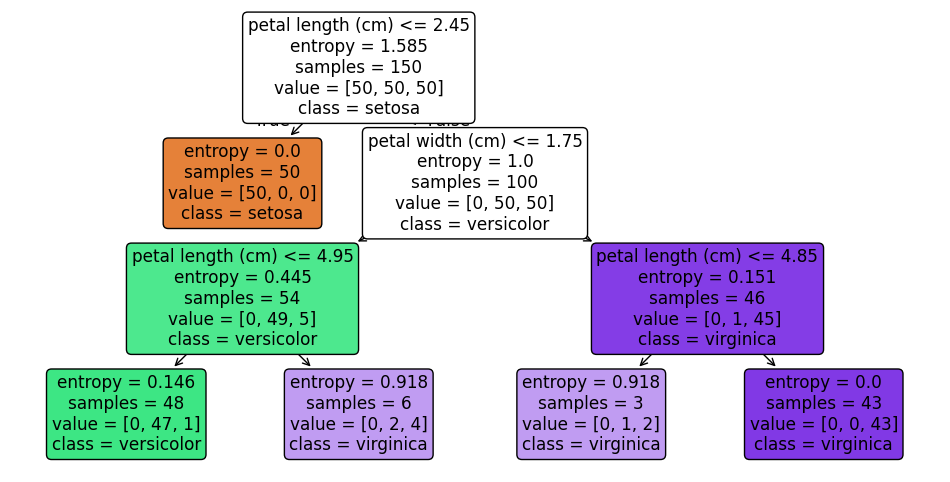

In [ ]:


X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()
